<div style="width: 30%; float: right; margin: 10px; margin-right: 5%;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/FHNW_Logo.svg/2560px-FHNW_Logo.svg.png" width="500" style="float: left; filter: invert(50%);"/>
</div>

<h1 style="text-align: left; margin-top: 10px; float: left; width: 60%;">
    gbvs Mini-Challenge 2 <br> 
</h1>

<p style="clear: both; text-align: left;">
    Bearbeitet durch Si Ben Tran im HS 2023.<br>Bachelor of Science FHNW in Data Science.
</p>

In dieser Mini-Challenge werden LE3 und LE4 von gbsv geprüft. In Data Science und Machine Learning werden oft Merkmale (Features) von Bildern und Signalen generiert, um basierend darauf zu analysieren oder zu lernen. Diesem Thema widmen wir uns mittels klassischer Signal- und Bildverarbeitung.

Jede:r Studierende:r hat eine individualisierte Aufgabenstellung. Die Abgabe soll ebenfalls einzigartig sein. 

Die Programmiersprache und die Code-Dokumentation darf frei gewählt werden. Sofern nicht anders erwähnt, dürfen vorhandene Bibliotheken verwendet werden. Gebe die Quellen deiner Daten und ggf. deines Codes an. 

Checkpoints: 

- Aufgabenstellung Rebuttal: In dieser Phase kann die Aufgabenstellung gereviewt und überarbeitet werden. Sofern die Studierenden entsprechende Argumente haben. Bis ca. 1 Woche nach MC-Start am Tag der Sprechstunde. 5. Dez. 2023

- Review ausgewählte Daten: Reviewe deine ausgewählten Daten bis 3 Wochen nach MC-Start mit der Fachexpertin. Das Review kann schriftlich oder in der Sprechstunde erfolgen. 12. Dez. 2023

- Anonymisierte Abgabe im Peer-Grading-Tool: Code, Resultate und Report gemäss Vorlage. Es können aktuell max. 100MB aufs Peer-Grading Tool geladen werden. 12. Jan. 2024 

- Peer-Grading von anderen Abgaben. In letzten Sprechstunde im Semester oder bis 19. Jan 2024. 

Die Termine sind jeweils um 23:59. 



# Setup und Imports

In [1]:
# auto reload for python files
%load_ext autoreload
%autoreload 2

# path for ipynb 
import os 
os.chdir('../')

In [2]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Image libraries
from PIL import Image
import cv2 as cv
from skimage import morphology

# 1 Mustersuche in Bild und Signal (LE3)

## 1.1. Korrelation in Signalen

Suche 1 Signal, welches wiederkehrende Muster enthält. Analyisere dann mittels Auto-Korrelation die wiederkehrenden Muster innerhalb deines Signals. Kann die Periodizität deines Musters via Auto-Korrelogramm sichtbar gemacht werden? Diskutiere deine Methoden- und Parameterwahl sowie die Resultate in ca. 150 Wörtern. 
Schneide nun ein Stück deines Signals aus und versuche es via Kreuzkorrelation im Ursprungssignal zu finden. Woran erkennst du, dass die Stelle passt? Beschreibe in 1-2 Sätzen. Verändere nun dein ausgeschnittenes Stück etwas und schaue, ob es immer noch via Kreuzkorrelation gefunden werden kann. Welche Arten von Veränderungen werden toleriert? Welche nicht? Diskutiere die Resultate in ca. 150 Wörtern. 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht. 


### 1.1.1 Signal mit wiederkehrende Muster

,time,signal
0,0.00000,2.062089
1,0.01001,1.906697
2,0.02002,1.794959
3,0.03003,1.607561
4,0.04004,1.063090
...,...,...
995,9.95996,1.053273
996,9.96997,1.640221
997,9.97998,1.793607
998,9.98999,1.852520


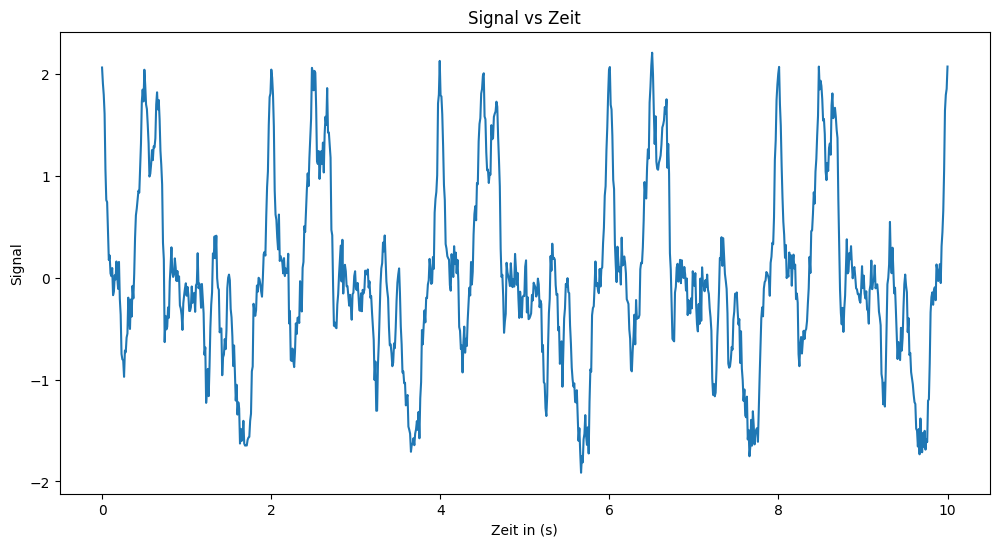

In [3]:
# Define the parameters for the signal
np.random.seed(42)  # For reproducibility
time = np.linspace(0, 10, 1000)
frequency = 1
amplitude = 1
noise_amplitude = 0.25
#
# Create a signal using a combination of sine and cosine functions with some noise
signals = amplitude * np.sin(1 * np.pi * frequency * time) ** 3 + \
         amplitude * np.cos(3 * np.pi * frequency * time) ** 5 + \
         amplitude * np.cos(4 * np.pi * frequency * time) ** 7 + \
         noise_amplitude * np.random.normal(size=len(time), scale=0.5)

# create a dataframe with signal and time
data = pd.DataFrame({'time': time, 'signal': signals})
display(data)

# visualize signal 
fig = plt.figure(figsize=(12, 6))
plt.plot(time, signals)
plt.xlabel('Zeit in (s)')
plt.ylabel('Signal')
plt.title('Signal vs Zeit')
plt.show()


### 1.1.2 Auto-Korrelation des Signals

Dokumentation für die Kreuzkorrelation von Statsmodel: [Link](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html)

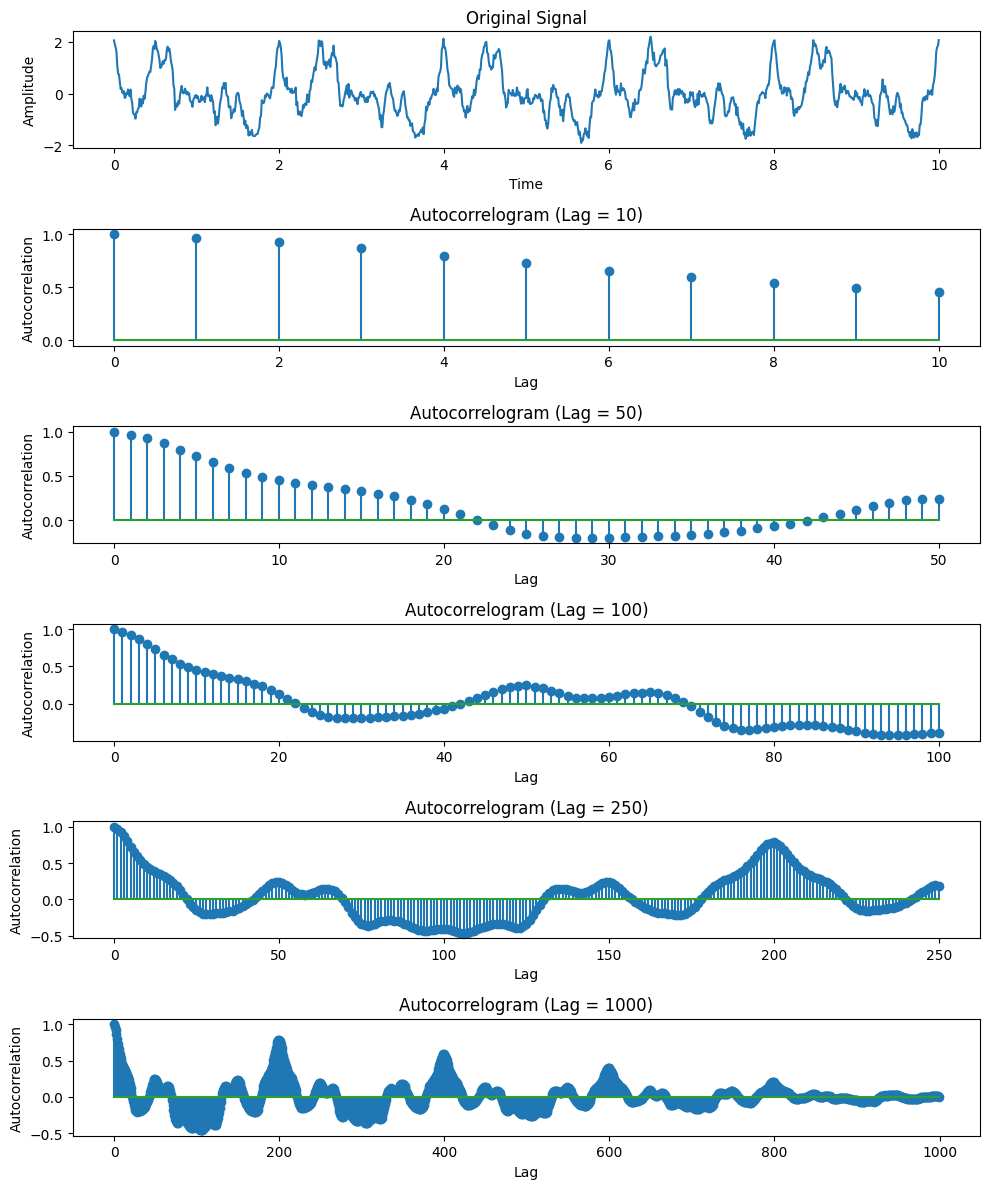

In [4]:
# Lags to plot
lags_to_plot = [0, 10, 50, 100, 250, len(signals)]

# Create subplots for each autocorrelation plot
fig, axes = plt.subplots(len(lags_to_plot), 1, figsize=(10, 12))

for i, lag in enumerate(lags_to_plot):
    # Compute autocorrelation for the current lag
    autocorrelation = acf(signals, nlags=lag)
    
    # Plot the original signal
    if i == 0:
        axes[i].plot(time, signals)
        axes[i].set_title('Original Signal')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel('Amplitude')
    else:
        # Plot the autocorrelogram for the current lag
        lags = np.arange(len(autocorrelation))
        axes[i].stem(lags, autocorrelation, basefmt = "C2-")
        axes[i].set_title(f'Autocorrelogram (Lag = {lag})')
        axes[i].set_xlabel('Lag')
        axes[i].set_ylabel('Autocorrelation')

plt.tight_layout()
plt.show()


### 1.1.3 Auschnitt aus dem Signal

,time,signal
102,1.021021,-0.168027
103,1.031031,-0.327068
104,1.041041,-0.326542
105,1.051051,-0.289076
106,1.061061,-0.086617
...,...,...
197,1.971972,1.498527
198,1.981982,1.771660
199,1.991992,1.808079
200,2.002002,2.041621


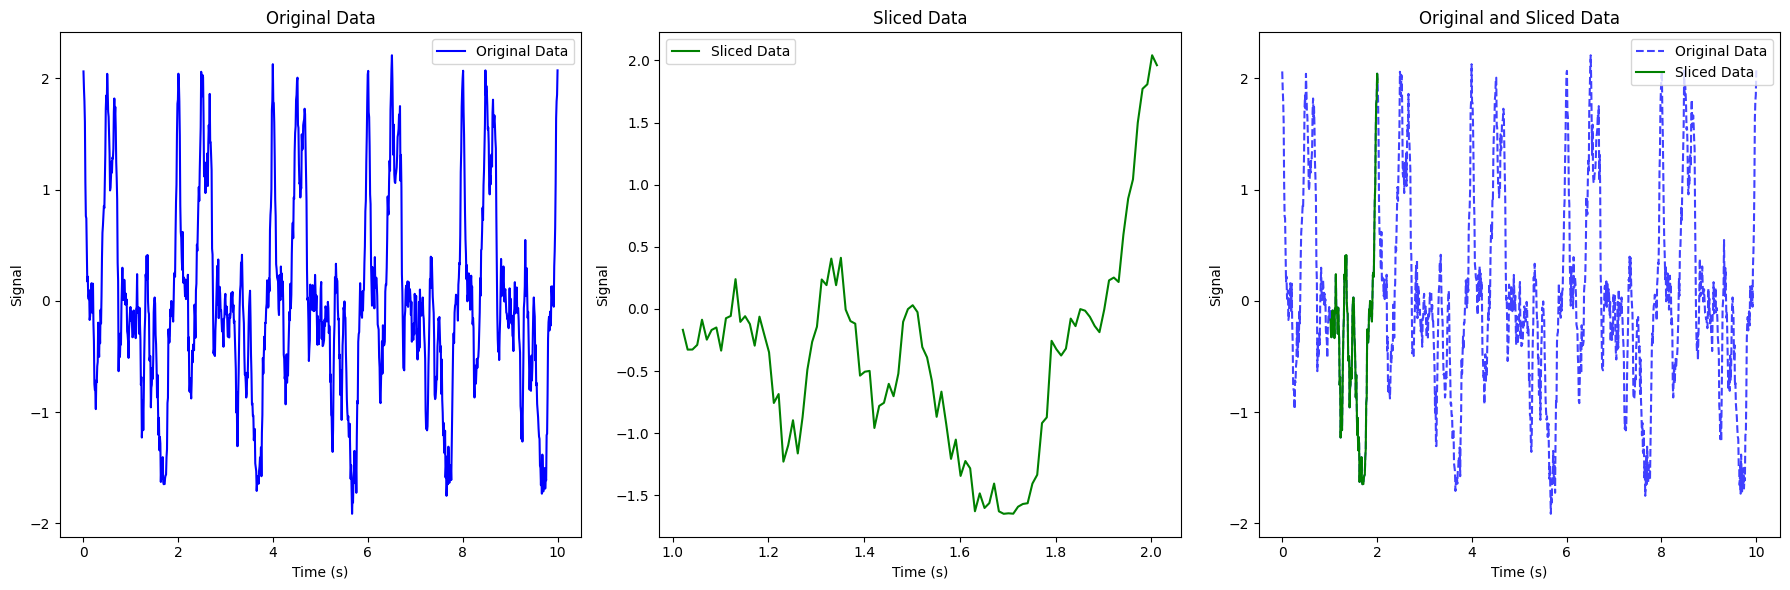

In [5]:
# Function for Slicing a DataFrame
def slice_signal(data, slice_length, random_seed=42):
    # Get the length of the signal data
    signal_length = len(data)

    # set random seed for reproducibility
    np.random.seed(random_seed)
    
    # Generate a random position to start the slice
    start_position = np.random.randint(0, signal_length - slice_length)
    
    # Slice the signal based on the random start position and defined slice length
    sliced_signal = data.iloc[start_position:start_position + slice_length]
    
    return sliced_signal

# Example usage of the slice_signal function with a defined slice length
slice_length = 100  # Define the length of the slice
sliced_data = slice_signal(data, slice_length)
display(sliced_data)

# Create a figure with three subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the original data in the first subplot
axes[0].plot(data['time'], data['signal'], label='Original Data', color='blue')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Signal')
axes[0].set_title('Original Data')

# Plot the sliced data in the second subplot
axes[1].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Signal')
axes[1].set_title('Sliced Data')

# Plot both original and sliced data in the third subplot
axes[2].plot(data['time'], data['signal'], label='Original Data', color='blue', linestyle='--', alpha=0.75)
axes[2].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Signal')
axes[2].set_title('Original and Sliced Data')

# Add legends to the plots
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()

### 1.1.4 Kreuzkorrelation des Auschnitts mit Orginalsignal

Dokumentation für die Kreuzkorrelation von Statsmodel: [Link](https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html)

In [6]:
def plot_data_and_correlation(data, sliced_data, data_name, single_row=True):
    # Compute the correlation
    corr = signal.correlate(data['signal'], sliced_data['signal'], mode='same')

    # Normalize correlation
    corr_norm = corr / np.max(corr)

    # Create a dataframe with corr_norm and reset_index and rename it to lags
    corr_norm_df = pd.DataFrame({'lags': corr_norm}).reset_index()
    corr_norm_df.columns = ['lags', 'corr_norm']

    # Create a figure with subplots
    if single_row:
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    else:
        fig, axes = plt.subplots(3, 1, figsize=(12, 12))

    # Plot the original data with the sliced data
    axes[0].plot(data['time'], data['signal'], label='Original Data', color='blue', linestyle='--', alpha=0.75)
    axes[0].plot(sliced_data['time'], sliced_data['signal'], label='Sliced Data', color='green')
    axes[0].set_xlabel('Time (s)')
    axes[0].set_ylabel('Signal')
    axes[0].set_title('Original and Sliced Data')
    axes[0].legend()

    # Plot the correlation
    axes[1].plot(corr, label='Correlation', color='blue')
    axes[1].set_xlabel('Lag')
    axes[1].set_ylabel('Correlation')
    axes[1].set_title('Correlation')
    axes[1].legend()

    # Plot the normalized correlation
    axes[2].plot(corr_norm, label='Normalized Correlation', color='blue')
    axes[2].set_xlabel('Lag')
    axes[2].set_ylabel('Normalized Correlation')
    axes[2].set_title('Normalized Correlation')
    axes[2].legend()

    # add overall title
    plt.suptitle(f'Orginal vs. {data_name} Kreuzkorrelation', fontsize=16)

    if single_row:
        plt.tight_layout()
    else:
        plt.subplots_adjust(hspace=0.5)

    plt.show()

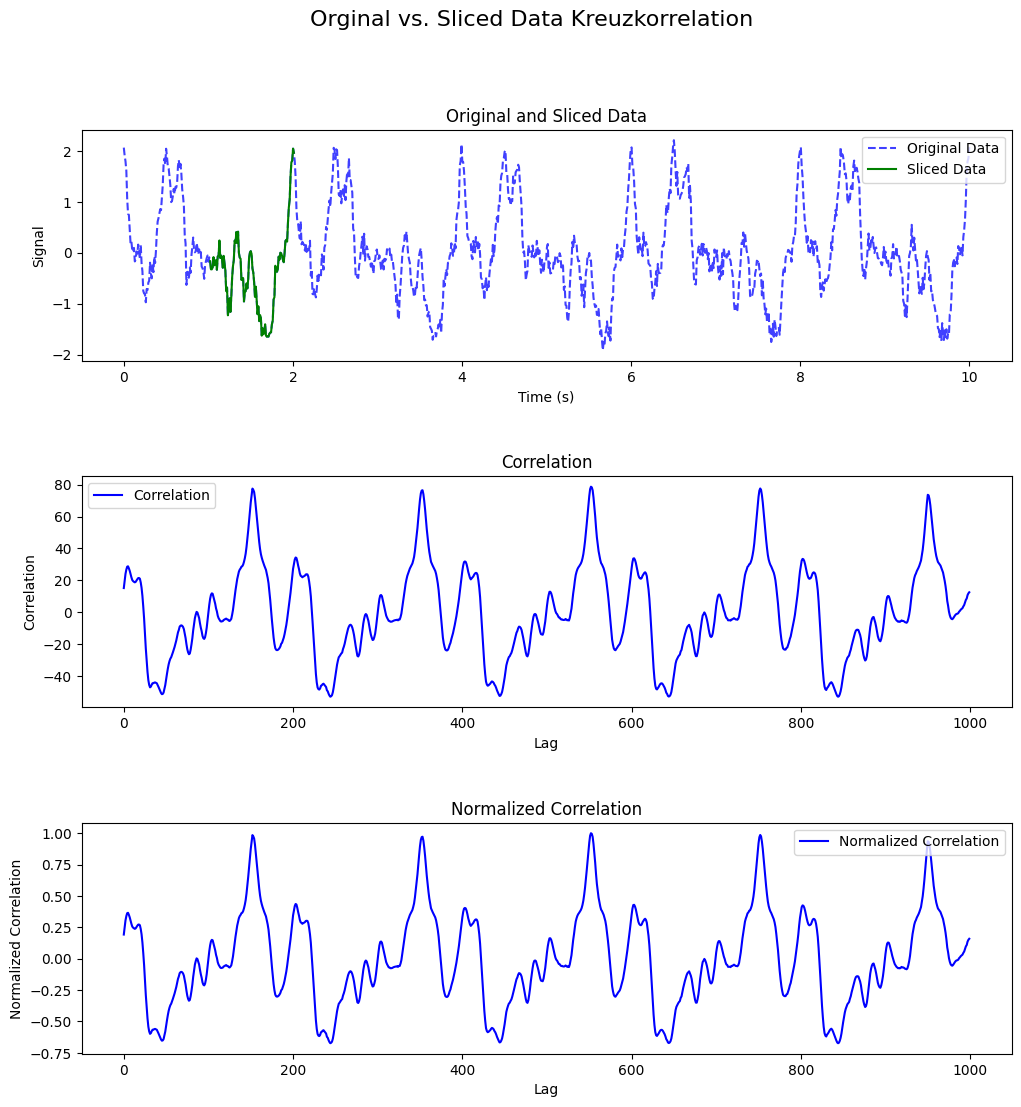

In [7]:
# call the function
plot_data_and_correlation(data, sliced_data, single_row=False, data_name='Sliced Data')

### 1.1.5 Auschnitt verändern

Wir definieren uns eine Klasse namens `SignalProcessor` der uns erlaubt, die Signale zu verändern. Die Klasse hat folgende Methoden:  

| Methode Name            | Beschreibung                               |
|--------------------------|-------------------------------------------|
| `addition_noise`         | Fügt dem Signal eine konstante hinzu.     |
| `multiplication_noise`   | Multipliziert das Signal mit einer konstante. |
| `addition_noise_random`  | Fügt dem Signal eine zufällige konstante hinzu. |
| `multiplication_noise_random` | Multipliziert das Signal mit einer zufälligen Konstanten. |
| `standarize_signal`      | Standarisiert das Signal.                 |
| `normalize_min_max_signal` | Normalisiert das Signal (min-max).       |
| `shuffle_signal`         | Mischelt das Signal.                      |
| `reverse_signal`         | Dreht das Signal um.                      |
| `log_transform_signal`   | Logarithmiert das Signal.                 |


In [8]:
class SignalProcessor:
    def __init__(self, data):
        self.data = data

    def _copy_data(self):
        return self.data.copy()

    def addition_noise(self, noise=0.25):
        modified_data = self._copy_data()
        modified_data['signal'] = modified_data['signal'] + noise
        return modified_data

    def multiply_noise(self, noise=0.25):
        modified_data = self._copy_data()
        modified_data['signal'] = modified_data['signal'] * noise
        return modified_data

    def add_random_noise(self, noise_amplitude=0.25, random_seed=42):
        np.random.seed(random_seed)
        noise = noise_amplitude * np.random.normal(size=len(self.data), scale=noise_amplitude)
        modified_data = self._copy_data()
        modified_data['signal'] = modified_data['signal'] + noise
        return modified_data

    def multiply_random_noise(self, noise_amplitude=0.25, random_seed=42):
        np.random.seed(random_seed)
        noise = noise_amplitude * np.random.normal(size=len(self.data), scale=noise_amplitude)
        modified_data = self._copy_data()
        modified_data['signal'] = modified_data['signal'] * noise
        return modified_data

    def standardize_signal(self):
        modified_data = self._copy_data()
        modified_data['signal'] = (modified_data['signal'] - modified_data['signal'].mean()) / modified_data['signal'].std()
        return modified_data

    def normalize_min_max_signal(self):
        modified_data = self._copy_data()
        modified_data['signal'] = (modified_data['signal'] - modified_data['signal'].min()) / (modified_data['signal'].max() - modified_data['signal'].min())
        return modified_data

    def shuffle_signal(self, random_seed=42):
        np.random.seed(random_seed)
        modified_data = self._copy_data()
        modified_data['signal'] = np.random.permutation(modified_data['signal'].values)
        return modified_data
    
    def reverse_signal(self):
        modified_data = self._copy_data()
        modified_data['signal'] = modified_data['signal'].values[::-1]
        return modified_data

    def log_transform_signal(self):
        modified_data = self._copy_data()
        # make sure that the signal is positive with abs
        modified_data['signal'] = np.abs(modified_data['signal'])
        modified_data['signal'] = np.log(modified_data['signal'])
        return modified_data

In [9]:
signal_processor = SignalProcessor(sliced_data)

### 1.1.6 Kreuzkorrelation des veränderten Auschnitts mit Orginalsignal

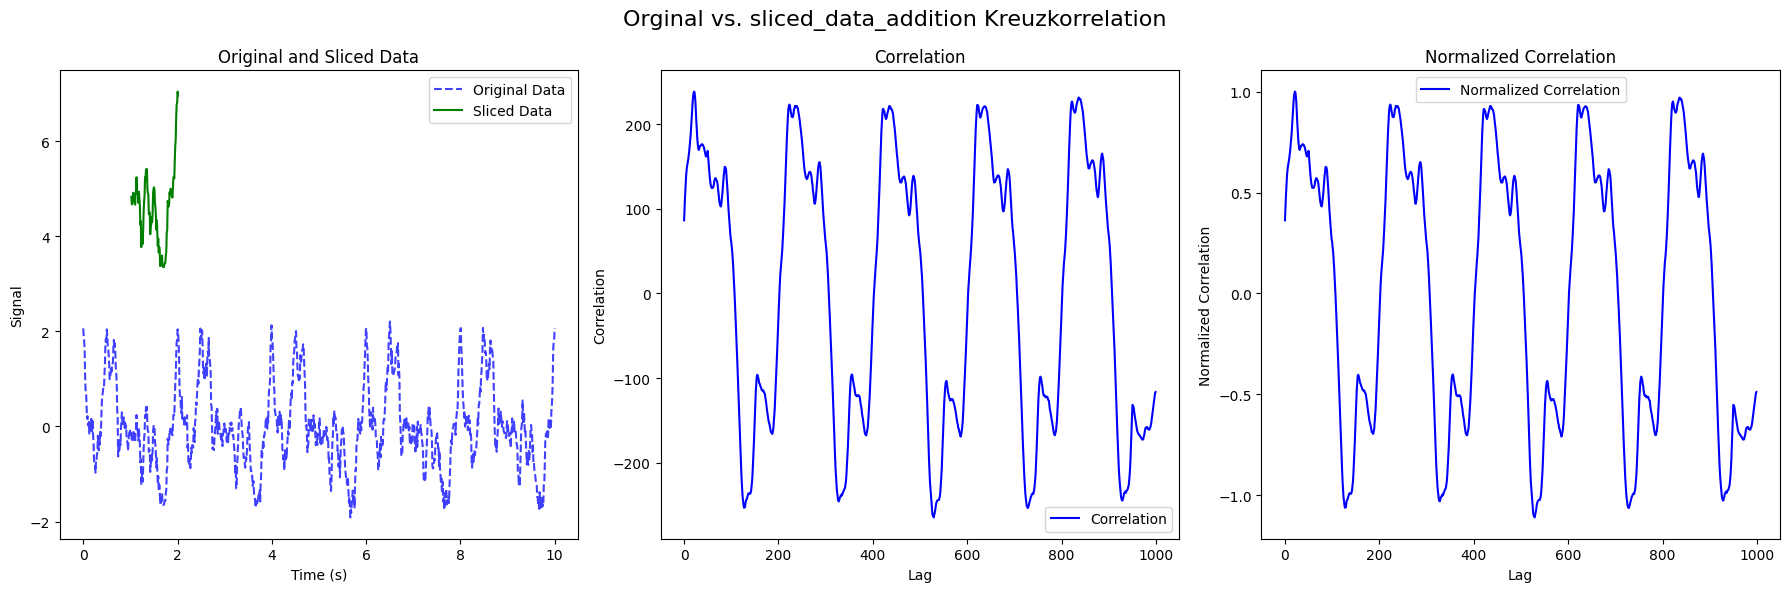

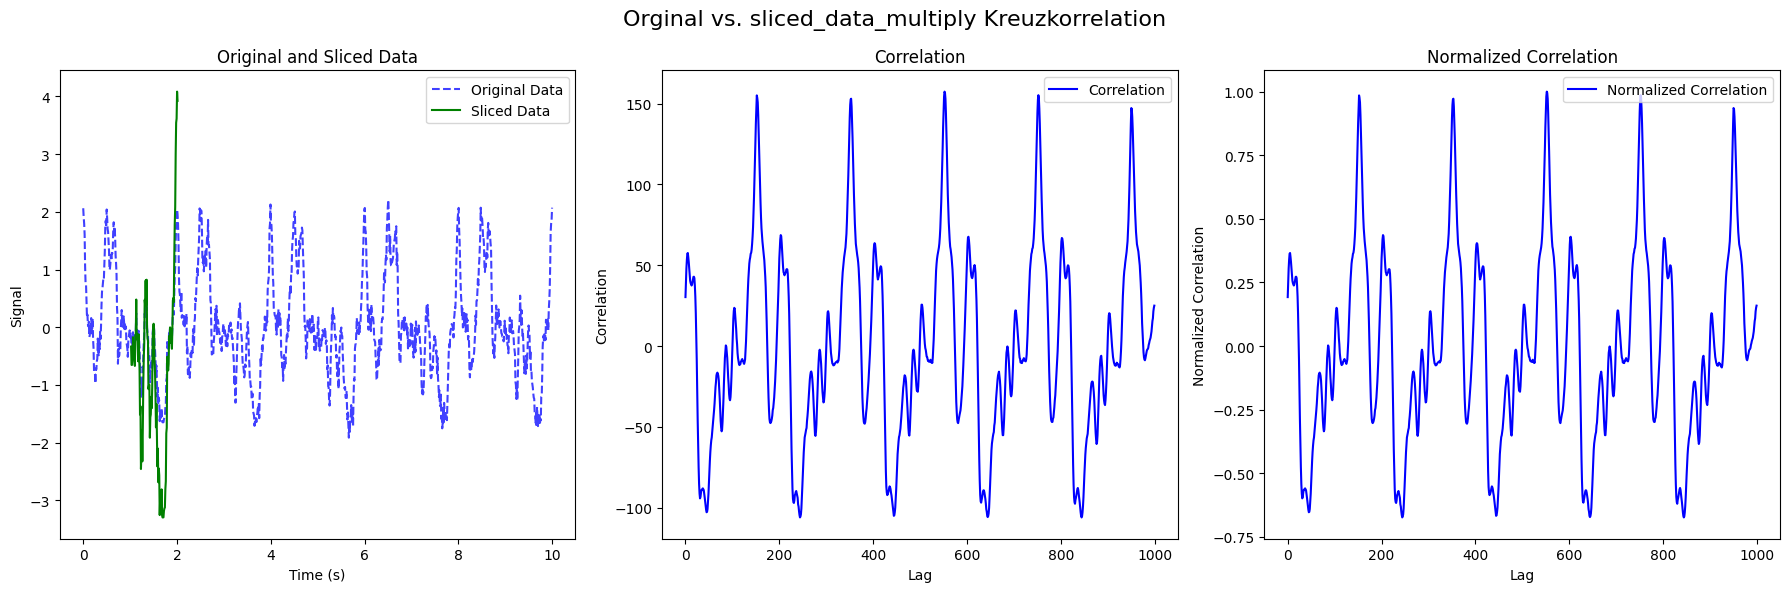

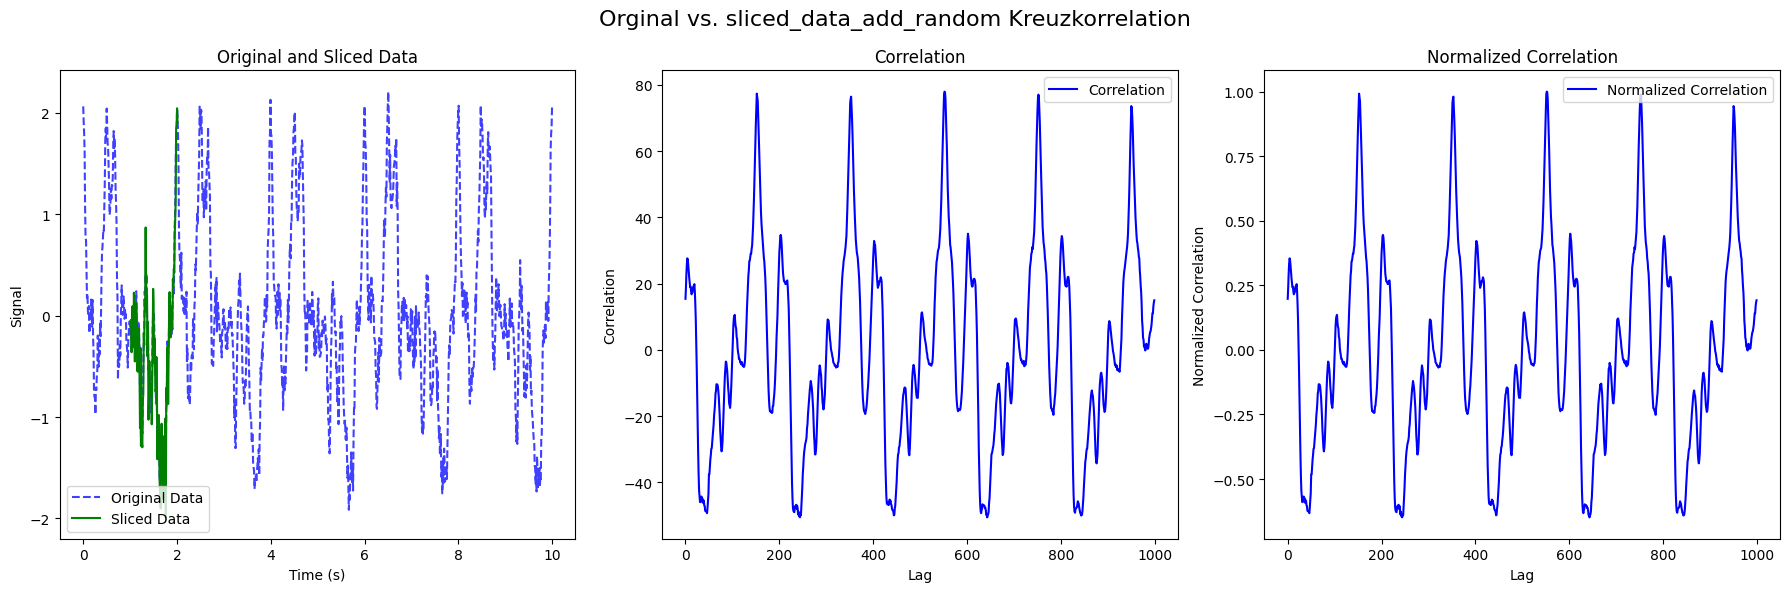

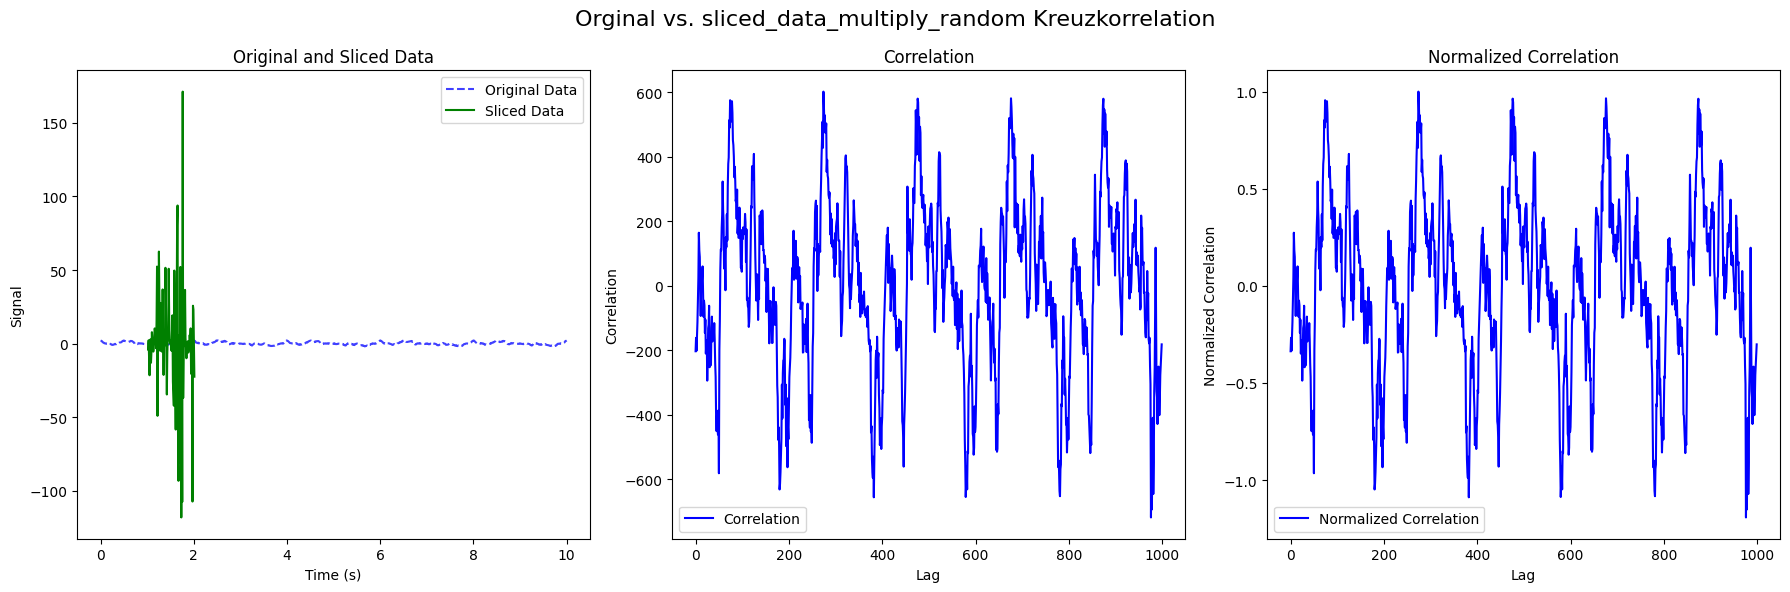

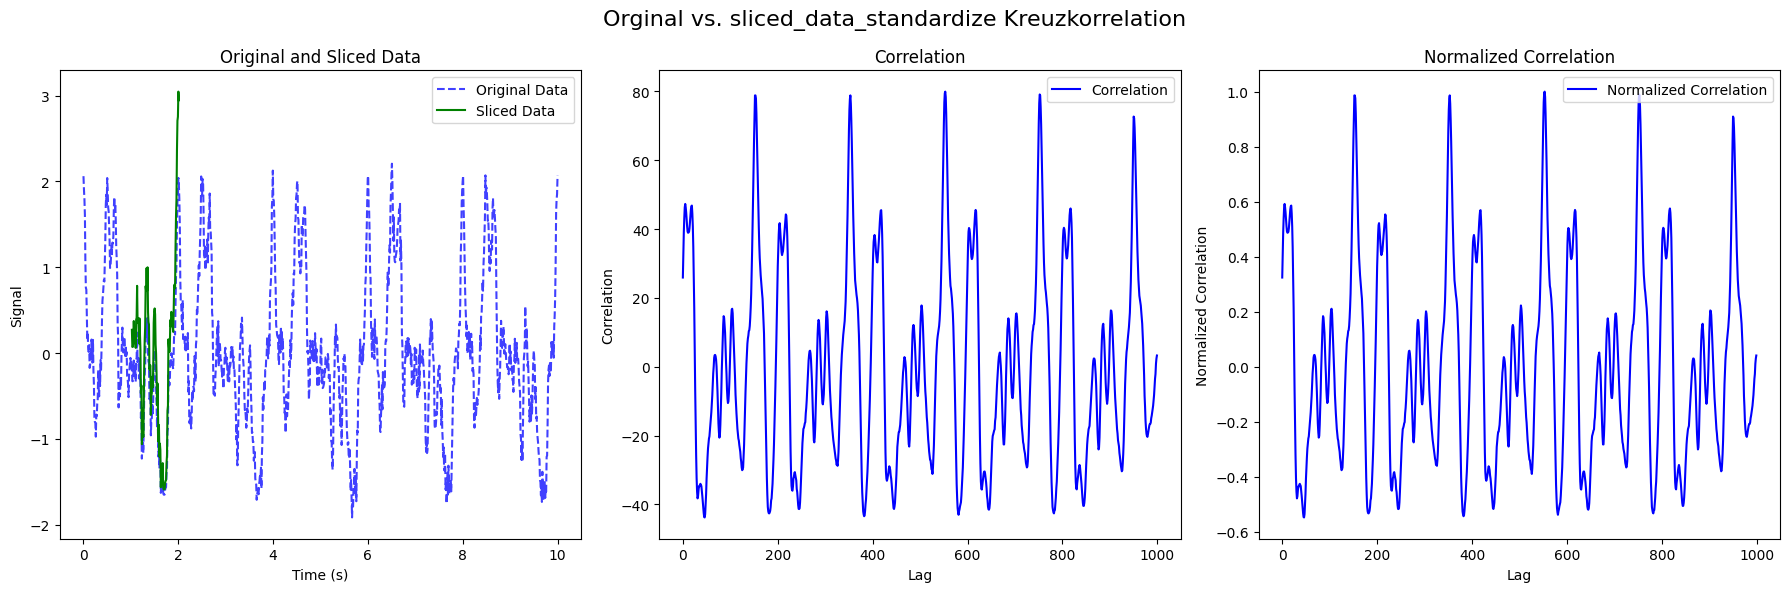

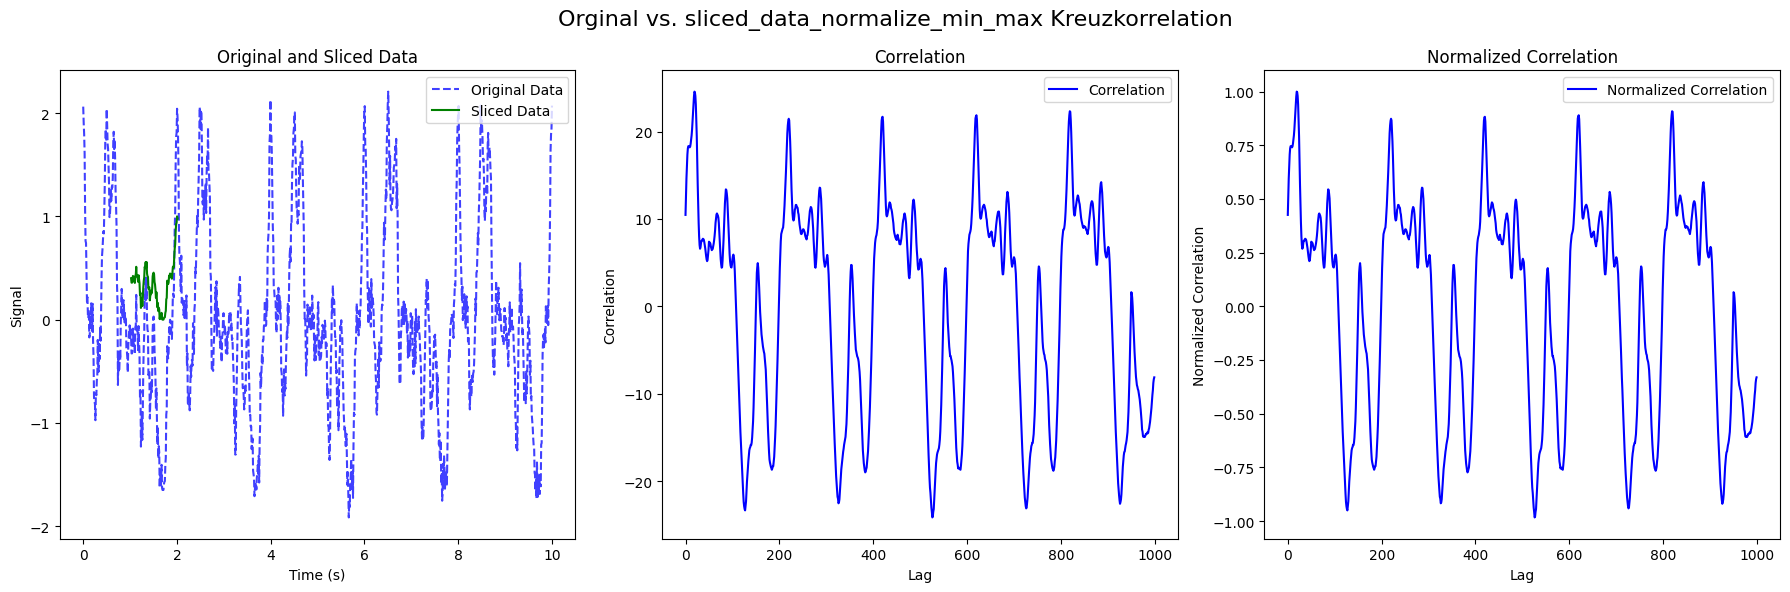

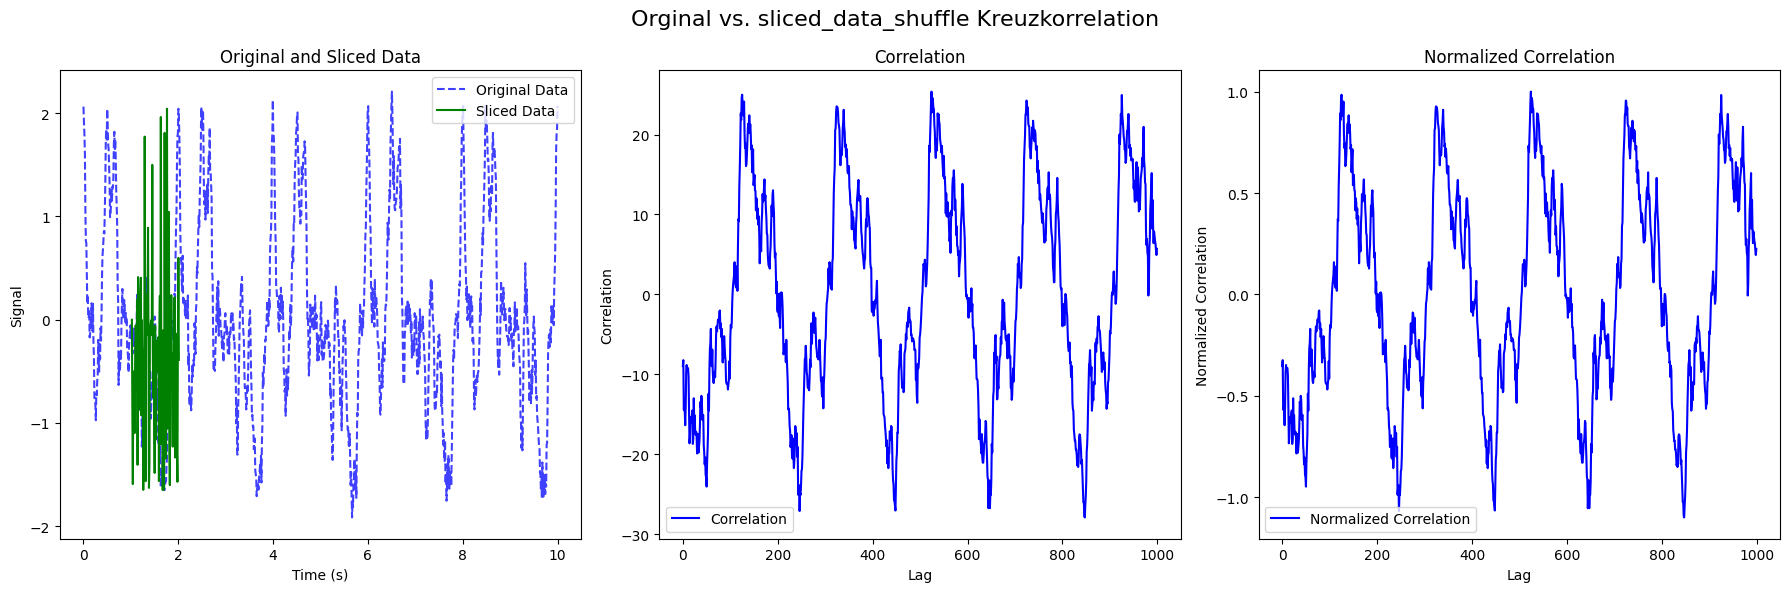

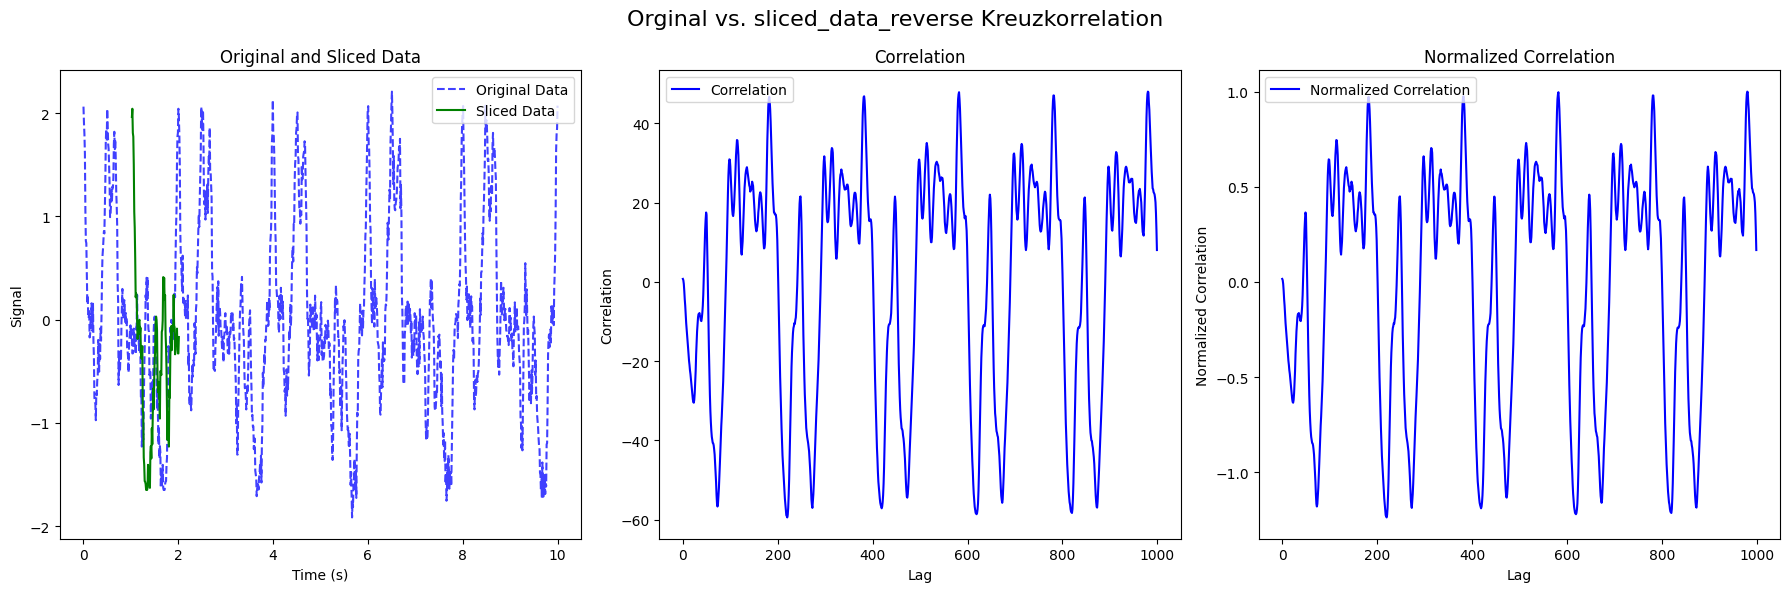

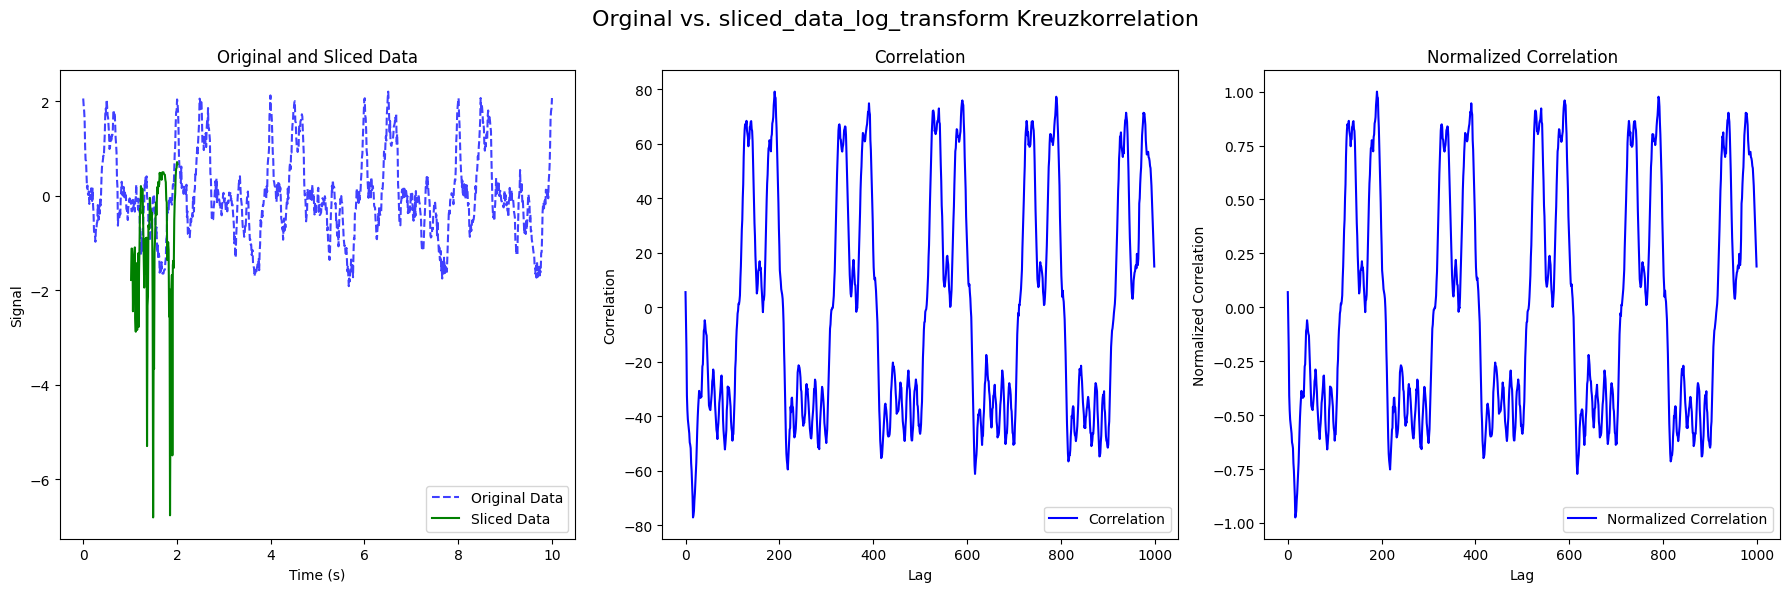

In [10]:
signal_processor = SignalProcessor(sliced_data)

sliced_data_addition = signal_processor.addition_noise(noise=5)
sliced_data_multiply = signal_processor.multiply_noise(noise=2)
sliced_data_add_random = signal_processor.add_random_noise(noise_amplitude=0.5)
sliced_data_multiply_random = signal_processor.multiply_random_noise(noise_amplitude=7)
sliced_data_standardize = signal_processor.standardize_signal()
sliced_data_normalize_min_max = signal_processor.normalize_min_max_signal()
sliced_data_shuffle = signal_processor.shuffle_signal()
sliced_data_reverse = signal_processor.reverse_signal()
sliced_data_log_transform = signal_processor.log_transform_signal()

# create dictionary with the data and the name, name as key
sliced_data_processed_dict = {
    "sliced_data_addition": sliced_data_addition,
    "sliced_data_multiply": sliced_data_multiply,
    "sliced_data_add_random": sliced_data_add_random,
    "sliced_data_multiply_random": sliced_data_multiply_random,
    "sliced_data_standardize": sliced_data_standardize,
    "sliced_data_normalize_min_max": sliced_data_normalize_min_max,
    "sliced_data_shuffle": sliced_data_shuffle,
    "sliced_data_reverse": sliced_data_reverse,
    "sliced_data_log_transform": sliced_data_log_transform
}

# iterate over the list and plot the data and correlation
for name, processed_data in sliced_data_processed_dict.items():
    plot_data_and_correlation(data, processed_data, single_row=True, data_name=name)

## 1.2 Segmentierung, morphologische Operationen, Objekteigenschaften in Bildern
Suche 1 Bild, welches mehrere ähnliche Objekte enthält. Diese Objekte sollen mittels geeigneter Methoden segmentiert werden. Die Resultate sollen als gelabelte Bilder (binär oder pro Klasse 1 Label) gespeichert werden. Zeige dabei, wie du die Labelmasken mittels morphologischer Operationen verbessert hast. Erkläre hier für jede angewendete Operation in 1-2 Sätzen, warum du diese Operation anwendest. Zeige auch in Einzelbildern die Zwischenresultate deiner angewendeten Operationen und dass du nur minimal die Objekte verändert hast (z.B. keine Verschiebungen, Verkleinerungen oder Vergrösserungen). Extrahiere am Ende deine einzelnen Objekte, zähle und vermesse 2-3 Eigenschaften deiner extrahierten Objekte mittels geeigneten Methoden. Erkläre pro Eigenschaft in 1-2 Sätzen, warum du diese gewählt hast und ob die Resultate brauchbar sind.  

Erstelle dann ein möglichst minimales aber repräsentatives Skeleton eines deiner Objekte und gebe die Anzahl Pixel des Skeletons aus. 

Diskutiere deine Erkenntnisse und Resultate in ca. 150 Wörtern. 
  
Weiterführende Links:
skimage: Label image regions
skimage: Segment human cells (in mitosis)
skimage: Measure region properties


### 1.2.1 Bild mit mehreren ähnlichen Objekten

Als Bild habe ich hier mein Lieblings Pokemon gewählt, das Enton. 

Die Eigenschaften eines Entons sin:
- Gelber Körper
- Beiger Schnabel und Füsse
- Weisse Augen mit schwarzen Pupillen und Haaren
- Enton ist eine Ente

Im Bild kommen 17 Entons vor.   
Im Bild kommen 9 Entons vor.


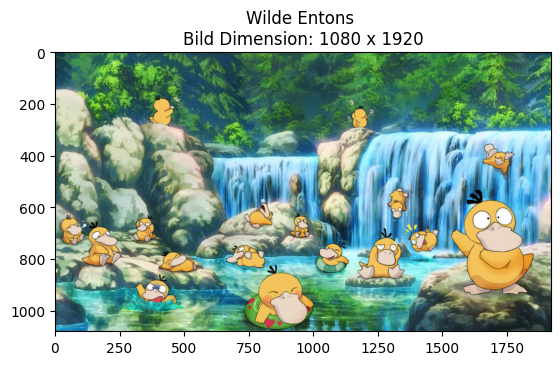

Image Shape: (1080, 1920, 3)


In [11]:
image = Image.open('data/image/pokemon-entons.jpg')

plt.imshow(image)
plt.title(f'Wilde Entons \nBild Dimension: {image.height} x {image.width}')
plt.show()

# convert image to numpy array
image_array = np.array(image)
print(f'Image Shape: {image_array.shape}')

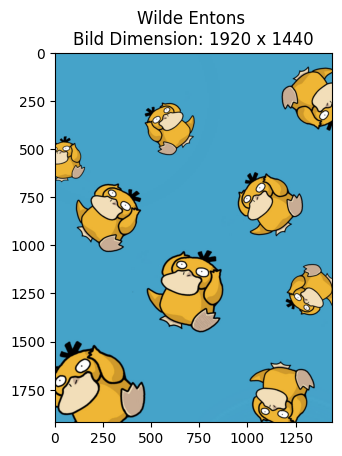

Image Shape: (1920, 1440, 3)


In [12]:
image = Image.open('data/image/pokemon-entons3.jpg')

plt.imshow(image)
plt.title(f'Wilde Entons \nBild Dimension: {image.height} x {image.width}')
plt.show()

# convert image to numpy array
image_array = np.array(image)
print(f'Image Shape: {image_array.shape}')


### 1.2.2 Segmentierung der Objekte

Geeignete Methoden der Segmentierung sind:
- Thresholding

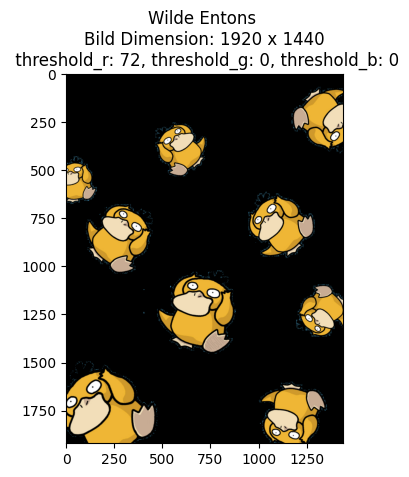

In [13]:
threshold_channel_r = 72
threshold_channel_g = 0
threshold_channel_b = 0

filter_image = image_array.copy()
filter_image[filter_image[:, :, 0] < threshold_channel_r] = 0
filter_image[filter_image[:, :, 1] < threshold_channel_g] = 0
filter_image[filter_image[:, :, 2] < threshold_channel_b] = 0

plt.imshow(filter_image)
plt.title(f'Wilde Entons \nBild Dimension: {image.height} x {image.width}\n threshold_r: {threshold_channel_r}, threshold_g: {threshold_channel_g}, threshold_b: {threshold_channel_b}')
plt.show()
# export filter_image as jpg
filter_image = Image.fromarray(filter_image)
filter_image.save('data/export/pokemon-entons-filtered.jpg')


In [14]:
# Create a function to apply a threshold filter to an image
def threshold_filter(image_path, threshold_r, threshold_g, threshold_b, save_image=True):
    # Load the image
    image = Image.open(image_path)
    image_array = np.array(image)
    
    # Apply the threshold filter
    filter_image = image_array.copy()
    filter_image[filter_image[:, :, 0] < threshold_r] = 0
    filter_image[filter_image[:, :, 1] < threshold_g] = 0
    filter_image[filter_image[:, :, 2] < threshold_b] = 0
       
    # Generate a specific hash for the image title
    image_title = f'r-{threshold_r}_g-{threshold_g}_b-{threshold_b}'
    export_path = f'data/export/enton-{image_title}.jpg'
    
    if save_image:
        filter_image = Image.fromarray(filter_image)
        filter_image.save(export_path)

def threshold_filter_all_colors(folder_path):
    # Check if the folder is empty
    if not os.listdir(folder_path):
        for r in range(60, 80):
            threshold_filter('data/image/pokemon-entons3.jpg', r, 0, 0, save_image=True)
    else:
        print("Files already exist in the folder.")

# call function
threshold_filter_all_colors('data/export/')

Files already exist in the folder.


In [15]:
# best threshold values
threshold_r = 72
threshold_g = 0
threshold_b = 0

# original image
image = Image.open('data/image/pokemon-entons3.jpg')
image_array = np.array(image)

# image segmentation
image_segmentation = Image.open('data/export/enton-r-72_g-0_b-0.jpg')
image_seg_array = np.array(image_segmentation)

# grey scale image
grey_image = image.convert('L')
grey_image_array = np.array(grey_image)

# segmentation mask
image_mask = image_seg_array.copy()
image_mask[image_mask[:, :, 0] > 0] = 255
image_mask[image_mask[:, :, 1] > 0] = 255
image_mask[image_mask[:, :, 2] > 0] = 255


In [16]:
# calculate the number of 0 pixels for each channel
print(f'Number of 0 pixels in channel r: {np.sum(image_seg_array[:, :, 0] == 0)}')
print(f'Number of 0 pixels in channel g: {np.sum(image_seg_array[:, :, 1] == 0)}')
print(f'Number of 0 pixels in channel b: {np.sum(image_seg_array[:, :, 2] == 0)}')

# calculate total pixel size of the image
print(f'Total number of pixels: {image_seg_array.size}')

# calulate the relation of 0 pixels for each channel
print(f'Relation of 0 pixels in channel r: {np.sum(image_seg_array[:, :, 0] == 0) / image_seg_array[:, :, 0].size}')
print(f'Relation of 0 pixels in channel g: {np.sum(image_seg_array[:, :, 1] == 0) / image_seg_array[:, :, 1].size}')
print(f'Relation of 0 pixels in channel b: {np.sum(image_seg_array[:, :, 2] == 0) / image_seg_array[:, :, 2].size}')


Number of 0 pixels in channel r: 2110115
Number of 0 pixels in channel g: 2084416
Number of 0 pixels in channel b: 2099146
Total number of pixels: 8294400
Relation of 0 pixels in channel r: 0.763207103587963
Relation of 0 pixels in channel g: 0.753912037037037
Relation of 0 pixels in channel b: 0.7592397280092592


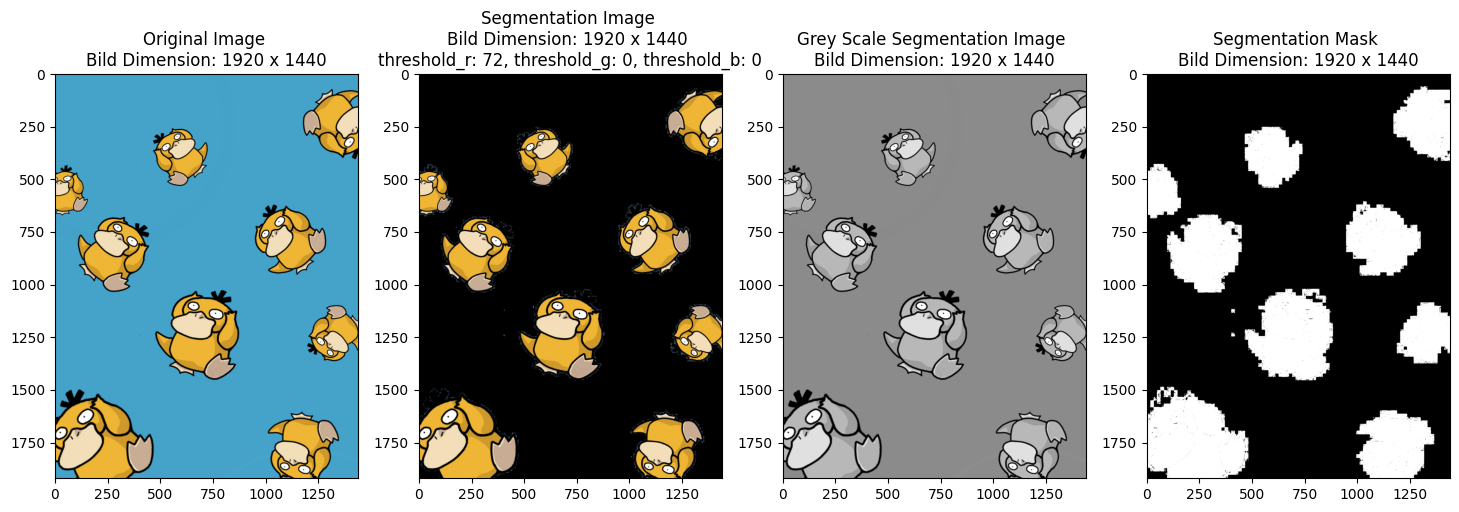

In [17]:
# grey scale image
grey_image = image.convert('L')
grey_image_array = np.array(grey_image)

# show image next to each other in 3 subplots in one figure
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
axes[0].imshow(image)
axes[0].set_title(f'Original Image \nBild Dimension: {image.height} x {image.width}')
axes[1].imshow(image_segmentation)
axes[1].set_title(f'Segmentation Image \nBild Dimension: {image_segmentation.height} x {image_segmentation.width} \nthreshold_r: {threshold_r}, threshold_g: {threshold_g}, threshold_b: {threshold_b}')
axes[2].imshow(grey_image, cmap='gray')
axes[2].set_title(f'Grey Scale Segmentation Image \nBild Dimension: {grey_image.height} x {grey_image.width}')
axes[3].imshow(image_mask)
axes[3].set_title(f'Segmentation Mask \nBild Dimension: {image_mask.shape[0]} x {image_mask.shape[1]}')
plt.show()


### 1.2.3 Labelmasken mittels morphologischer Operationen verbessern

Morphologische Operationen sind:
- Dilation (Vergrösserung)
- Erosion (Verkleinerung)
- Opening und Closing (Erosion + Dilation)

Für jede angewendete Operation muss erklärt werden, warum diese angewendet wurde in 1-2 Sätzen.


In [18]:
# Funktion um Bilder neben einander zu plotten 
def plot_three_images(image1: np.ndarray, image2: np.ndarray, image3: np.ndarray, cmap: str = 'gray', titles: list[str] = None):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    ax[0].imshow(image1, cmap=cmap)
    ax[0].axis('off')
    ax[1].imshow(image2, cmap=cmap)
    ax[1].axis('off')
    ax[2].imshow(image3, cmap=cmap)
    ax[2].axis('off')

    if titles is not None:
        for idx, title in enumerate(titles):
            ax[idx].set_title(title)

    plt.tight_layout()
    plt.show()

In [19]:
# convert image_mask to cv image
image_mask_cv = cv.cvtColor(image_mask, cv.COLOR_RGB2GRAY)

#### 1.2.3.1 Dilation (Vergrösserung)


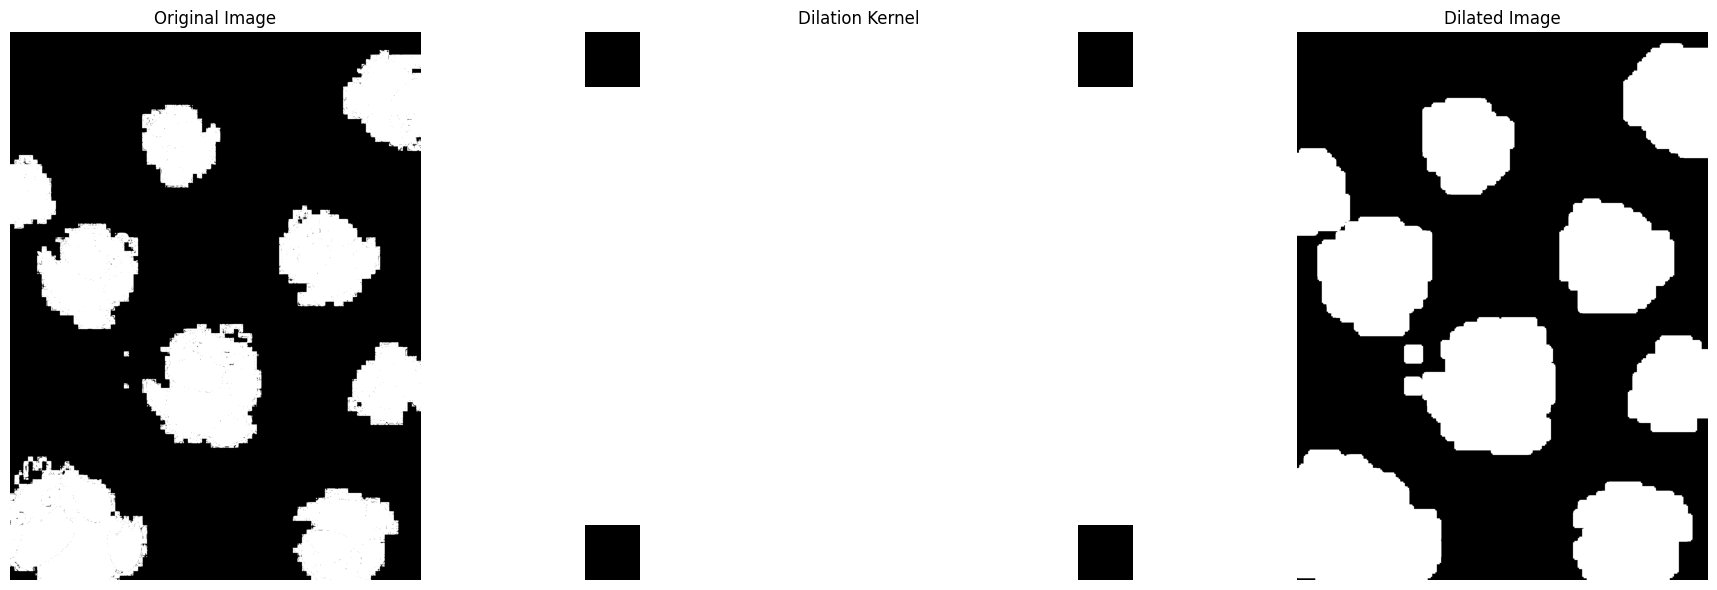

In [20]:
D_dim = 50
D_dim_10 = D_dim // 10
D = np.zeros((D_dim, D_dim), np.uint8)
D[D_dim_10 :-D_dim_10] = 1
D[:, D_dim_10:-D_dim_10] = 1

img_dilation = cv.dilate(image_mask_cv, D, iterations=1)
plot_three_images(image_mask_cv, D, img_dilation, titles=['Original Image', 'Dilation Kernel', 'Dilated Image'])

#### 1.2.3.2 Erosion (Verkleinerung)

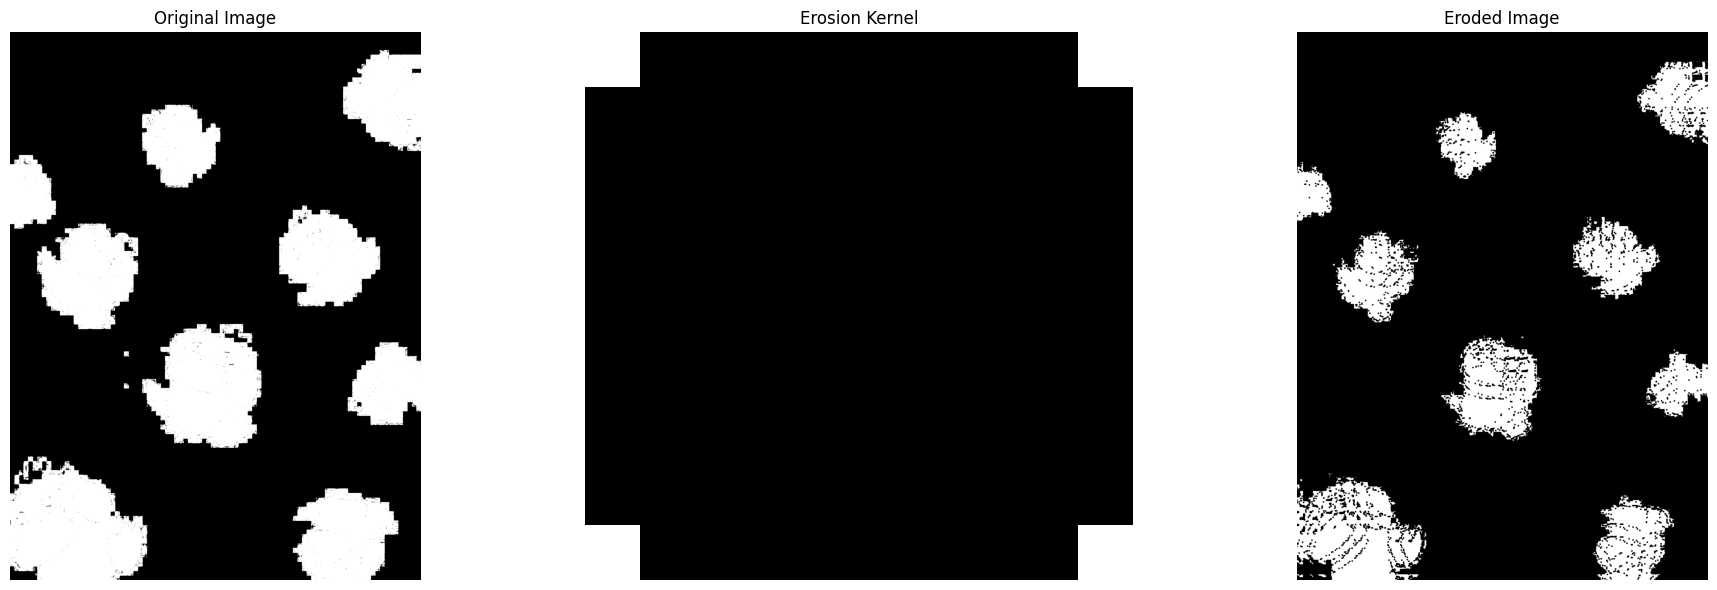

In [21]:
E_dim = 50
E_dim_10 = E_dim // 10
E = np.ones((E_dim, E_dim), np.uint8)
E[E_dim_10 :-E_dim_10] = 0
E[:, E_dim_10:-E_dim_10] = 0

img_erosion = cv.erode(image_mask_cv, E, iterations=1)
plot_three_images(image_mask_cv, E, img_erosion, titles=['Original Image', 'Erosion Kernel', 'Eroded Image'])


#### 1.2.3.4 Opening und Closing (Erosion + Dilation)

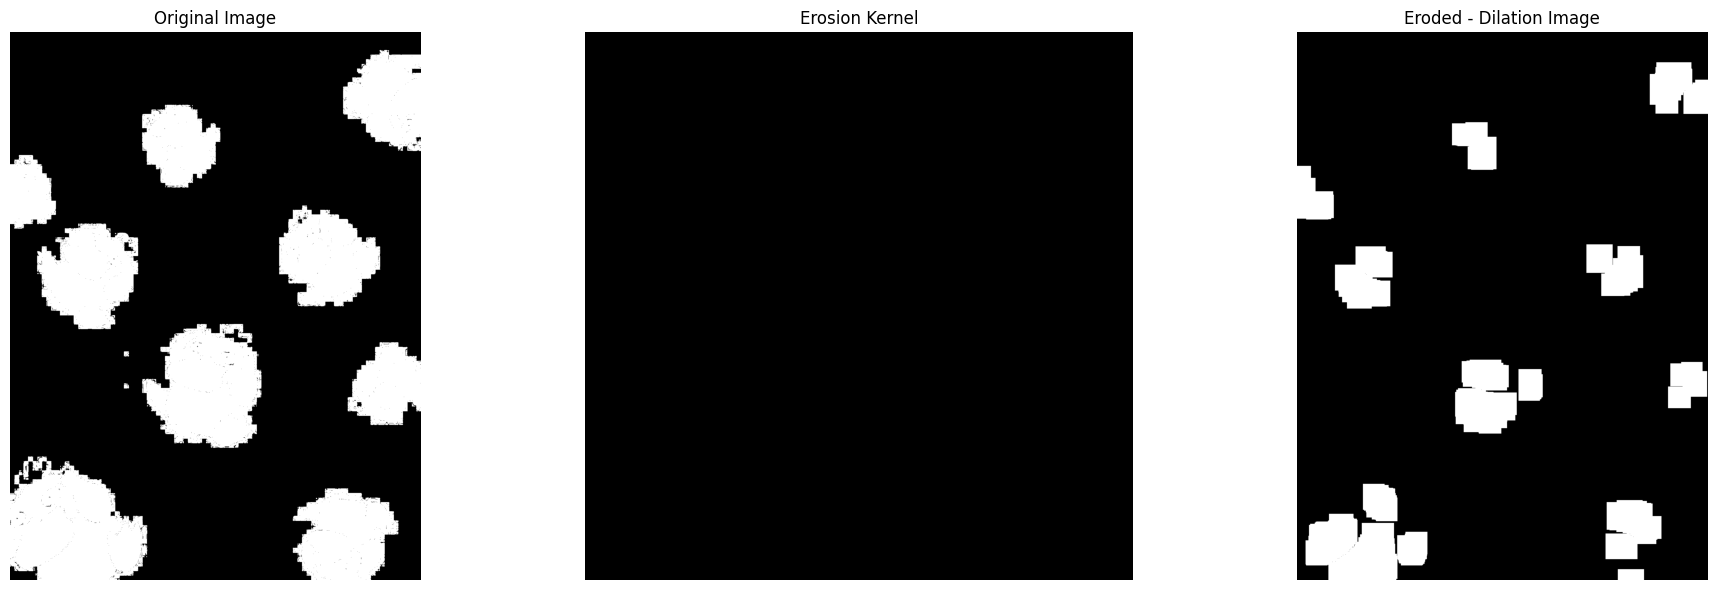

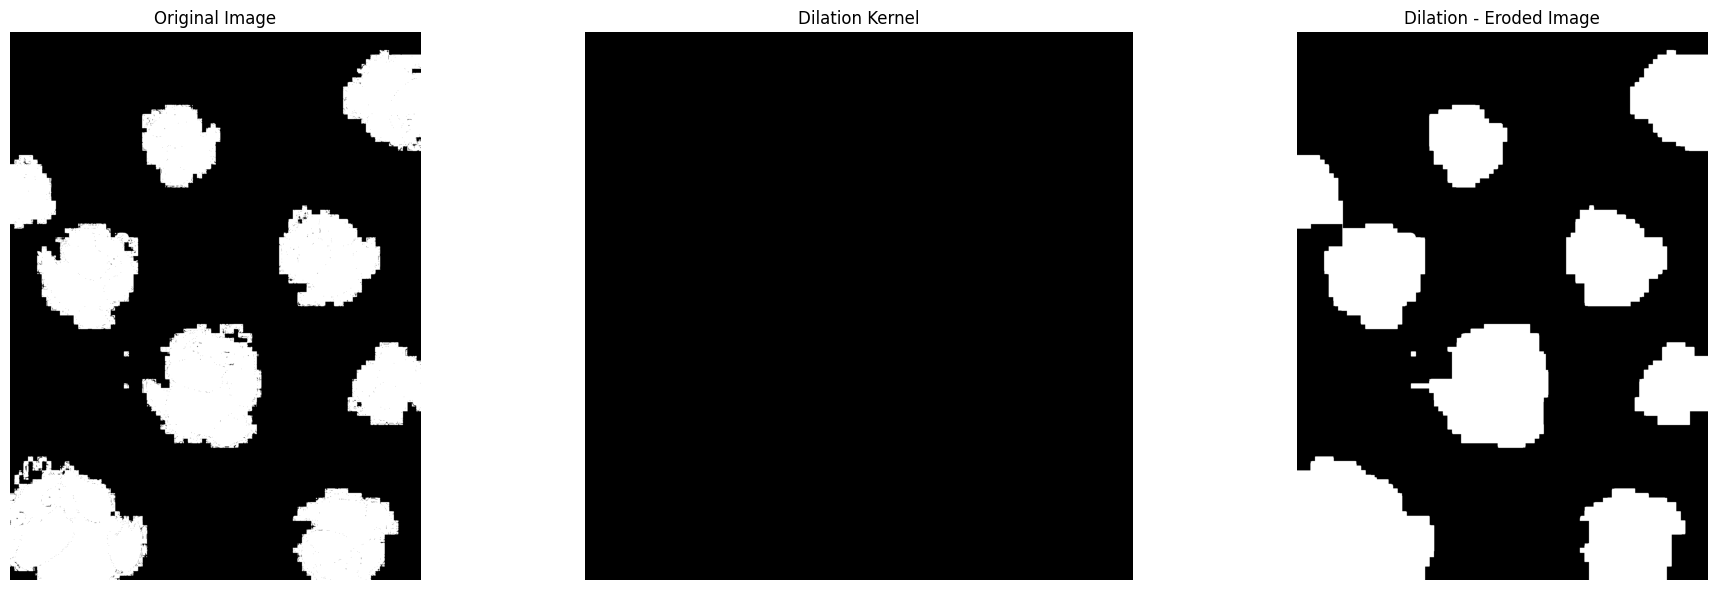

In [22]:
E_D_dim = 75
E_D_dim_10 = E_D_dim // 10
E_D = np.ones((E_D_dim, E_D_dim), np.uint8)

ero_dil_img = cv.dilate(cv.erode(image_mask_cv, E_D, iterations=1), E_D, iterations=1)
dil_ero_img = cv.erode(cv.dilate(image_mask_cv, E_D, iterations=1), E_D, iterations=1)

# plot with kernel
plot_three_images(image_mask_cv, E_D, ero_dil_img, titles=['Original Image', 'Erosion Kernel', 'Eroded - Dilation Image'])
plot_three_images(image_mask_cv, E_D, dil_ero_img, titles=['Original Image', 'Dilation Kernel', 'Dilation - Eroded Image'])

### 1.2.4 Extrahieren der einzelnen Objekte

### 1.2.5 Zählen und Vermessen von Eigenschaften


### 1.2.6 Erstellen eines Skeletons und Anzahl Pixel

# 2 Feature Deskriptoren in Bildern (LE4)

## 2.1 Keypoint Matching
Suche ein paar Bilder mit dem gleichen Sujet/Objekt aus, welche das Objekt von unterschiedlichen Blickwinkeln, aus anderer Perspektive, aus unterschiedlicher Distanz oder rotiert zeigen. Wende dann den dir zugeordneten Keypoint Deskriptor {'BRISK'} an, um mindestens zwei deiner Bilder via Keypoints zu "matchen". Wähle dafür geeignete Parameter und eine geeignete Anzahl Keypoints. Erläuere deine Entscheidungen in 1-2 Sätzen. Zeige deine Resultate visuell und stelle 2-3 Beobachtungen auf. 
Diskutiere in ca. 150 Wörtern wie robust der dir zugeordnete Algorithms {'BRISK'} ist in Bezug auf Transformationen oder unterschiedlicher Aufnahmeverhältnisse (Licht, ...) und dessen rechnerische Effizienz. Zeige mindestens eine dieser Eigenschaften anhand deiner Beispieldaten. Diskutiere die Resultate und Erkenntnisse in 2-3 Sätzen. 

Achtung: dies ist eine offene Aufgabenstellung. Setzt euch selbst einen Rahmen für die Beschränkung oder kommt in die Sprechstunde, sofern euch die Grenzen nicht klar sind. Treffende Datenwahl, auf den Punkt gebrachte Kreativität, massvolle Vielfalt und kritisches Denken sind gesucht.


## 3. Peer-Grading
Nach Abgabe der Mini-Challenge hast du 1 Woche Zeit drei dir zugeordnete Abgaben von anderen zu bewerten. Die Zuordnung erfolgt via FHNW Peer-Grading-Tool (siehe Link unten). Orientiere dich für die Bewertung an den vorgegebenen Bewertungskriterien (siehe Excel-Datei oder Peer-Grading-Tool). Die Note 5 bedeutet, dass alles erfüllt ist, wie du es von einem guten Data Scientist in der Praxis erwarten würdest. Du startest als Baseline mit der Note 5. Entdeckst du Fehler, geht die Note nach unten. Der Note 5.5 nähert man sich, wenn die Erwartungen übertroffen wurden. Der Note 6 nähert man sich, wenn die Leistung ausserordentlich ist und kritisches Denken, Variabilität, eigene Ideen und Kreativität beinhaltet. Siehe auch Checkliste für Bewertung. Die Benotung soll auf Zehntel gerundet sein. Wer auf Zehntel gerundet mit 0.1 Abweichung die Endnote von der Fachexpertin trifft, kriegt einen Bonus von 0.2 Noten für die eigene Abgabe. In der Sprechstunde vom 16. Januar widmen wir uns dem Peer-Grading. 
Weiterführende Links:
FHNW Peer-Grading-Tool
